<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab" data-toc-modified-id="Colab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colab</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading" data-toc-modified-id="Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading</a></span><ul class="toc-item"><li><span><a href="#extra-one-hot-features" data-toc-modified-id="extra-one-hot-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>extra one-hot features</a></span></li><li><span><a href="#extra-keywords" data-toc-modified-id="extra-keywords-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>extra keywords</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BERT</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TextCNN" data-toc-modified-id="TextCNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TextCNN</a></span><ul class="toc-item"><li><span><a href="#notes:" data-toc-modified-id="notes:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>notes:</a></span></li></ul></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSTM</a></span></li></ul></div>

# Colab

In [53]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Text-Classification/code")
!pip install pyLDAvis
!pip install gensim
!pip install pandas==1.3.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import 

In [54]:
from classification_utils import *
from clustering_utils import *
from eda_utils import *
from nn_utils_keras import *
from feature_engineering_utils import *
from data_utils import *
import warnings 
warnings.filterwarnings("ignore")

# Loading

In [55]:
train, test = load_data(only_stem_voc=False, sample50=False)
# train, upsampling_info = upsampling_train(train)

train_text, train_label = train_augmentation(train, select_comb=[['reply', 'reference_one', 'reference_two']])
# train_text, train_label = train_augmentation(train, select_comb=[['text'], ['reply', 'reference_one', 'reference_two']])
# train_text, train_label = train['text'], train['label']
# test_text, test_label = test['text'], test['label']
test_text, test_label = test[['reply', 'reference_one', 'reference_two']].apply(lambda x: " ".join(x), axis=1), test['label']


# test_text = test_text.apply(lambda x: extract_stem_voc(x))
# train_text = train_text.apply(lambda x: extract_stem_voc(x))
# train_text.to_csv("stem_voc_train.csv")
# test_text.to_csv("stem_voc_test.csv")

# train_text, test_text = load_stem_voc()


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']
combination 1 train:  ['reply', 'reference_one', 'reference_two']


In [56]:
####################################
### label mapper
####################################
labels = sorted(train_label.unique())
label_mapper = dict(zip(labels, range(len(labels))))
train_label = train_label.map(label_mapper)
test_label = test_label.map(label_mapper)
y_train = train_label
y_test = test_label

print(train_text.shape)
print(test_text.shape)
print(train_label.shape)
print(test_label.shape)
print(labels)

(11083,)
(7761,)
(11083,)
(7761,)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [57]:
####################################
### hyper params 
####################################
# filters = '"#$%&()*+,-/:;<=>@[\\]^_`{|}~\t\n0123465789!.?\''
# MAX_NB_WORDS_ratio = 0.95
# MAX_DOC_LEN_ratio = 0.99
# MAX_NB_WORDS = eda_MAX_NB_WORDS(train_text, ratio=MAX_NB_WORDS_ratio, char_level=False, filters=filters)
# MAX_DOC_LEN = eda_MAX_DOC_LEN(train_text, ratio=MAX_DOC_LEN_ratio, char_level=False, filters=filters)

In [58]:
# X_train, X_test, word_to_idx, tfidf_vect = tfidf_vectorizer(train_text, test_text, stop_words=True, binary=True, min_df=5)
# X_train, transform_mapper = dimension_reduction(X_train, out_dim=1000) # not allow negative 
# X_test = transform_mapper.transform(X_test)

## extra one-hot features

In [59]:
# one_hot_X_train, one_hot_X_test, one_hot_word_to_idx, one_hot_count_vect = count_vectorizer(
#     train['Subject']+" " + train['Organization'], test['Subject']+" " + test['Organization'], stop_words=True, binary=False, min_df=3, max_df=0.001)

## extra keywords

In [60]:
# label_docs = train.groupby('label')['text'].apply(lambda x: " ".join(x)) # 要去除标点符号
# dtm, _, label_word_to_idx, _ = count_vectorizer(label_docs, [''], stop_words=True, min_df=1, binary=True)
# label_idx_to_word = dict([val, key] for key, val in label_word_to_idx.items())
# keywords_threshold = 1
# keywords_idx = np.where(dtm.sum(axis=0)<=keywords_threshold)[0]
# print(" keywords_idx shape: ")
# voc = [label_idx_to_word[idx] for idx in keywords_idx]

# keywords_X_train, keywords_X_test, keywords_word_to_idx, keywords_count_vect = count_vectorizer(
#     train['text'], test['text'], voc=voc, stop_words=True, min_df=1, binary=True)

In [61]:
# _X_train = np.hstack([X_train])
# _X_test = np.hstack([X_test])
# _X_train = np.hstack([X_train, one_hot_X_train, keywords_X_train])
# _X_test = np.hstack([X_test, one_hot_X_test, keywords_X_test])

# BERT

In [62]:
!pip install transformers
!pip install torchinfo
import torch
import torch.nn.functional as F

from torchinfo import summary
from transformers import BertTokenizer, BertModel, AdamW, BertConfig, get_linear_schedule_with_warmup

from bert_utils.training_utils import extract_contextual_embedding, train_multi_label_model, model_eval
from bert_utils.data_loader import  data_loader_BERT
from bert_utils import glovar 
from bert_utils.model import *

In [63]:
train_one_hot_labels = F.one_hot(torch.tensor(y_train.values))
test_one_hot_labels = F.one_hot(torch.tensor(test_label.values))

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained("bert-base-uncased", output_attentions = True, output_hidden_states = True)
# global device
device = glovar.device_type
bert_model = bert_model.to(device)
print(next(bert_model.parameters()).device)  # 输出：cpu
summary(bert_model)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda:0


Layer (type:depth-idx)                             Param #
BertModel                                          --
├─BertEmbeddings: 1-1                              --
│    └─Embedding: 2-1                              23,440,896
│    └─Embedding: 2-2                              393,216
│    └─Embedding: 2-3                              1,536
│    └─LayerNorm: 2-4                              1,536
│    └─Dropout: 2-5                                --
├─BertEncoder: 1-2                                 --
│    └─ModuleList: 2-6                             --
│    │    └─BertLayer: 3-1                         7,087,872
│    │    └─BertLayer: 3-2                         7,087,872
│    │    └─BertLayer: 3-3                         7,087,872
│    │    └─BertLayer: 3-4                         7,087,872
│    │    └─BertLayer: 3-5                         7,087,872
│    │    └─BertLayer: 3-6                         7,087,872
│    │    └─BertLayer: 3-7                         7,087,872
│    │   

In [65]:
load_embed= True

learning_rate = 0.0001
epochs = 80
patience = 60
MAX_DOC_LEN = 200
batch_size=32


max_len = min(512, MAX_DOC_LEN)
label_size = 20
label_cols = labels
embed_dim = 768
hidden_units = 64
num_filters = 30
kernel_sizes = [1,2,3]

In [66]:
if load_embed is True:
    train_sentences_encoding = np.load('train_sentences_encoding.npy')# , mmap_mode='r')
    train_input_ids = np.load('train_input_ids.npy')#, mmap_mode='r')
    train_sentences_encoding = torch.tensor(train_sentences_encoding)
    train_input_ids = torch.tensor(train_input_ids)
else:
    train_input_ids, train_sentences_encoding = extract_contextual_embedding(train_text, tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=True)
    # train_input_ids, train_sentences_encoding = extract_contextual_embedding(train_text.iloc[1:3], tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=False) test
    np.save('train_sentences_encoding.npy', train_sentences_encoding)
    np.save('train_input_ids.npy', train_input_ids)


dataloader, validation_dataloader = data_loader_BERT(train_sentences_encoding, train_input_ids, train_one_hot_labels, batch_size, random_state=1234, test_size=0.1)
del train_sentences_encoding, train_input_ids

In [67]:
model_path = 'bert_clf'
label_size = len(labels)
# model = lstm_cnn_o1(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
# model = lstm_cnn_o2(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
# model = clf(embed_dim, max_len, hidden_units, label_size)
model = clf_naive(embed_dim, max_len, hidden_units, label_size, dropout_rate=0.0)
model.to(device)

clf_naive(
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=768, out_features=384, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=384, out_features=192, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.0, inplace=False)
    (7): Linear(in_features=192, out_features=64, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.0, inplace=False)
    (10): Linear(in_features=64, out_features=20, bias=True)
  )
)

In [68]:
[torch.cuda.empty_cache() for _ in range(10) ]
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    1288 MB |    1288 MB |    4477 GB |    4476 GB |
|       from large pool |    1284 MB |    1284 MB |    2939 GB |    2938 GB |
|       from small pool |       4 MB |      21 MB |    1538 GB |    1538 GB |
|---------------------------------------------------------------------------|
| Active memory         |    1288 MB |    1288 MB |    4477 GB |    4476 GB |
|       from large pool |    1284 MB |    1284 MB |    2939 GB |

cuda

======== Epoch 1 / 40 ========
Training...
  Batch    40  of    312.    Elapsed: 0:00:00.
  Batch    80  of    312.    Elapsed: 0:00:00.
  Batch   120  of    312.    Elapsed: 0:00:00.
  Batch   160  of    312.    Elapsed: 0:00:00.
  Batch   200  of    312.    Elapsed: 0:00:00.
  Batch   240  of    312.    Elapsed: 0:00:01.
  Batch   280  of    312.    Elapsed: 0:00:01.

  Average training loss: 3.00
  Training epcoh took: 0:00:01

Performance on training...
pred_labels (9974, 20)
true_labels (9974, 20)
    Epoch 1	 Train Loss: 2.9955	 Train Loss v2 2.9949	 train Acc: 0.0000	 train F1: 0.0000	 AUC: 0.5745	 precision: 0.0000	 recall: 0.0000
Running Validation...
pred_labels (1109, 20)
true_labels (1109, 20)
    Epoch 1	 Train Loss: 2.9955	 Val Loss 2.9948	 Val Acc: 0.0000	 Val F1: 0.0000	 AUC: 0.5887	 precision: 0.0000	 recall: 0.0000
model saved

======== Epoch 2 / 40 ========
Training...
  Batch    40  of    312.    Elapsed: 0:00:00.
  Batch    80  of    312.    Elapsed: 0:00:00.

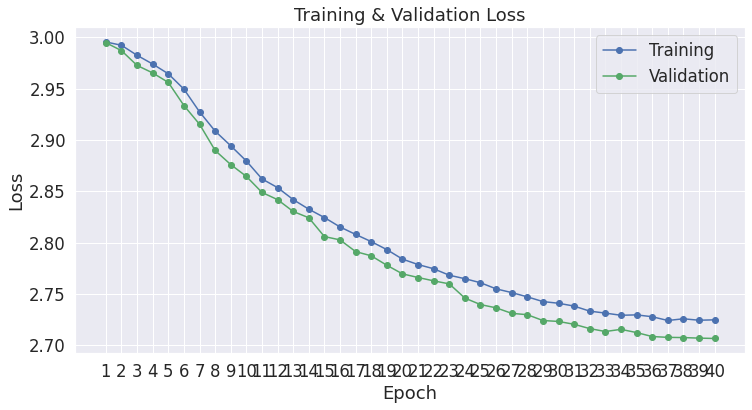

In [69]:
model = clf_naive(embed_dim, max_len, hidden_units, label_size, dropout_rate=0.2)
model.to(device)

# Data Loader

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
total_steps = len(dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(total_steps * 0.1), num_training_steps=total_steps)
model, training_stats, pred_labels, true_labels = train_multi_label_model(model, label_size, label_cols, dataloader, validation_dataloader, optimizer=optimizer, scheduler=scheduler, epochs=epochs, patience=patience, model_path=model_path)


pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats.to_csv(model_path[0:-2] + 'csv')

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(list(range(1, epochs + 1)))
plt.show()

In [70]:
# model.load_state_dict(torch.load(model_path))

In [71]:
if load_embed is True:
    test_sentences_encoding = np.load('test_sentences_encoding.npy')#, mmap_mode='r')
    test_input_ids = np.load('test_input_ids.npy') # , mmap_mode='r')
    test_sentences_encoding = torch.tensor(test_sentences_encoding)
    test_input_ids = torch.tensor(test_input_ids)
else:
    test_input_ids, test_sentences_encoding = extract_contextual_embedding(test_text, tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=True)
    np.save('test_sentences_encoding.npy', test_sentences_encoding)
    np.save('test_input_ids.npy', test_input_ids)


test_dataloader, _ = data_loader_BERT(test_sentences_encoding,test_input_ids, test_one_hot_labels, testing=True)
del test_sentences_encoding, test_input_ids

tokenized_texts, pred_labels, true_labels, avg_val_loss, auc_score, precison, recall, acc, f1 = model_eval(model, test_dataloader,  labels , class_weight=None)
classification_report = evaluation_report(np.argmax(true_labels, axis=1),  np.argmax(pred_labels, axis=1), labels=labels)
roc_auc(y_test, pred_labels)

pred_labels (7761, 20)
true_labels (7761, 20)
classification_report:
f1:  {'micro avg': 0.3232830820770519, 'macro avg': 0.23616569266173695} 

                          precision  recall  f1-score  support
alt.atheism                    0.00    0.00      0.00    319.0
comp.graphics                  0.21    0.29      0.24    389.0
comp.os.ms-windows.misc        0.00    0.00      0.00    394.0
comp.sys.ibm.pc.hardware       0.00    0.00      0.00    392.0
comp.sys.mac.hardware          0.00    0.00      0.00    385.0
comp.windows.x                 0.21    0.60      0.32    395.0
misc.forsale                   0.45    0.77      0.57    390.0
rec.autos                      0.00    0.00      0.00    395.0
rec.motorcycles                0.31    0.63      0.41    398.0
rec.sport.baseball             0.22    0.70      0.34    397.0
rec.sport.hockey               0.00    0.00      0.00    827.0
sci.crypt                      0.40    0.59      0.47    396.0
sci.electronics                0.00  

In [72]:
np.argmax(train_one_hot_labels, axis=1)

tensor([ 0,  0,  0,  ..., 19, 19, 19])

In [73]:
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Best F1,AUC,precison,recall,Best epoch,Training Time,Validation Time
epoch,,,,,,,,,,
1,3.00,2.99,0.00,0.00,0.59,0.00e+00,0.00,0,0:00:01,0:00:00
2,2.99,2.99,0.00,0.00,0.57,0.00e+00,0.00,1,0:00:01,0:00:00
3,2.98,2.97,0.04,0.02,0.58,1.79e-02,0.04,1,0:00:01,0:00:00
4,2.97,2.97,0.04,0.01,0.61,7.49e-03,0.04,1,0:00:01,0:00:00
5,2.96,2.96,0.09,0.03,0.65,1.67e-02,0.07,4,0:00:01,0:00:00
6,2.95,2.93,0.09,0.05,0.67,4.38e-02,0.08,5,0:00:01,0:00:00
7,2.93,2.92,0.12,0.05,0.69,3.89e-02,0.10,6,0:00:01,0:00:00
8,2.91,2.89,0.13,0.10,0.73,1.36e-01,0.11,7,0:00:01,0:00:00
9,2.89,2.88,0.15,0.10,0.74,1.12e-01,0.13,8,0:00:01,0:00:00
